In [138]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [139]:
np.random.seed(0)

In [140]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [141]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
print(y_test.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000
10000


In [142]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of trian images is not equal to the number of train labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of test images is not equal to the number of test labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28*28."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28*28."

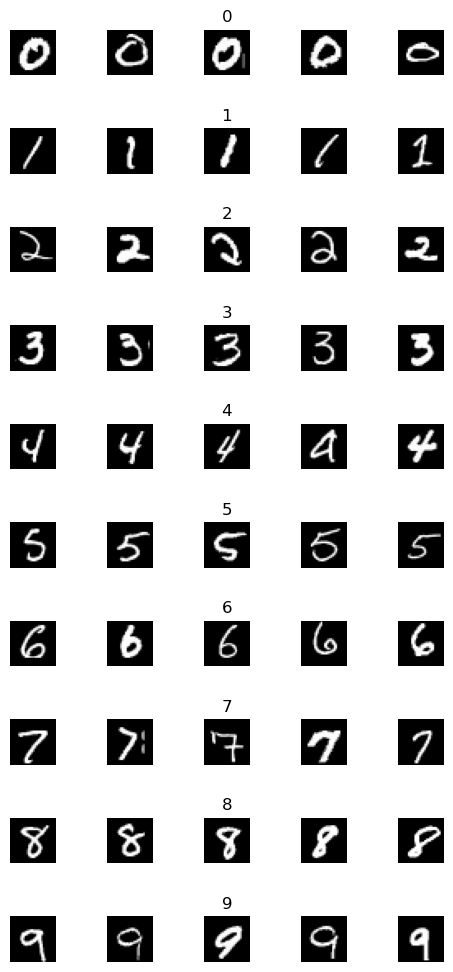

In [143]:
num_of_samples = []

cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range (cols):
    for j in range (num_classes):
        x_selected = X_train[y_train ==j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

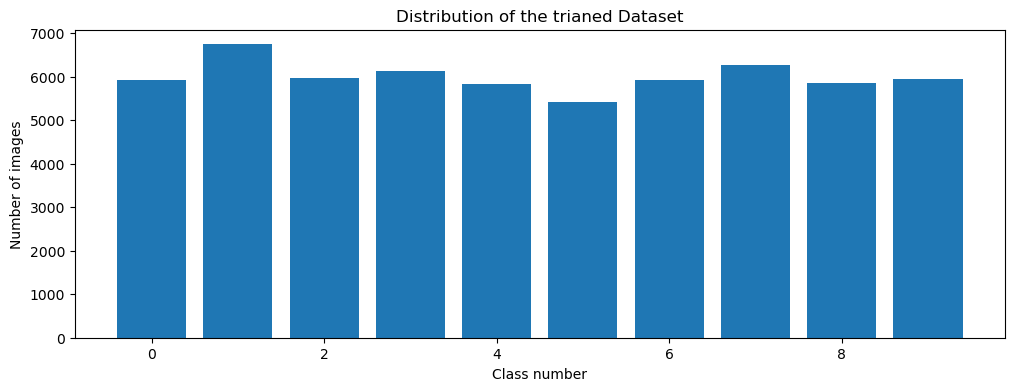

In [144]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the trianed Dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [145]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [146]:
X_train = X_train/255
X_test = X_test/255

In [147]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [148]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [149]:
model = create_model()
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,600 (33.59 KB)

 Trainable params: 8,600 (33.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [150]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7239 - loss: 0.8296 - val_accuracy: 0.9275 - val_loss: 0.2555
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9164 - loss: 0.2881 - val_accuracy: 0.9397 - val_loss: 0.1992
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9304 - loss: 0.2401 - val_accuracy: 0.9483 - val_loss: 0.1728
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9376 - loss: 0.2112 - val_accuracy: 0.9383 - val_loss: 0.2070
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9366 - loss: 0.2108 - val_accuracy: 0.9473 - val_loss: 0.1740
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9386 - loss: 0.2051 - val_accuracy: 0.9460 - val_loss: 0.1747
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9395 - loss: 0.1958 - val_accuracy: 0.9400 - val_loss: 0.1885
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9406 - loss: 0.1952 - val_accuracy: 0

Text(0.5, 0, 'epoch')

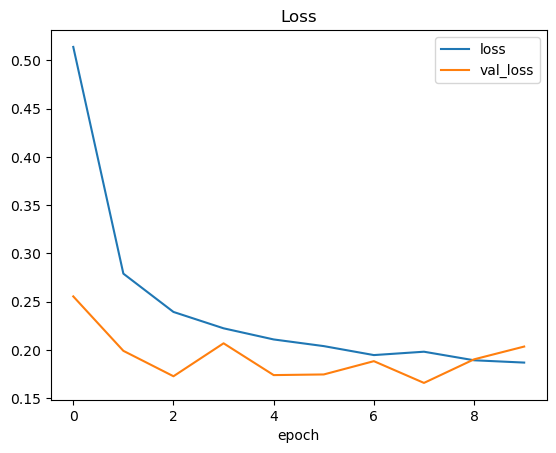

In [151]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

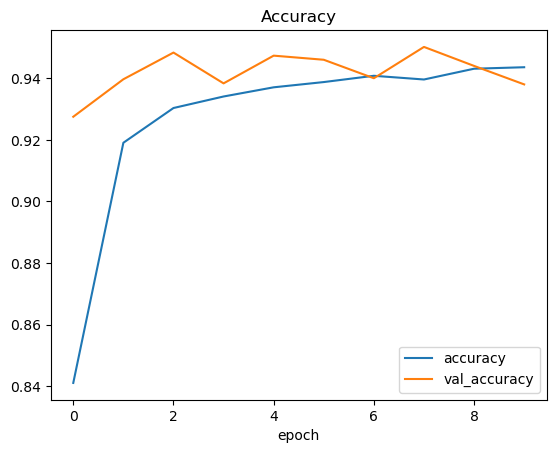

In [152]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [153]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print("Test Score: ", score[0])
print("Test Accuracy: ", score[1])

<class 'list'>
Test Score:  0.24013444781303406
Test Accuracy:  0.9322999715805054


In [154]:
import requests
from PIL import Image

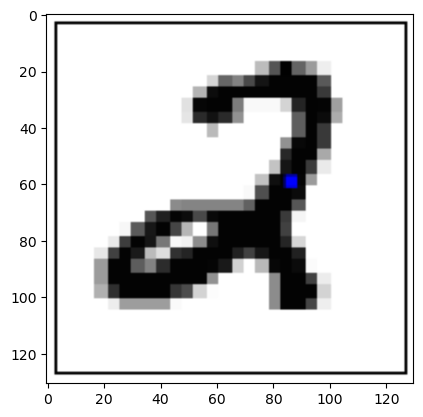

In [155]:
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [156]:
import cv2

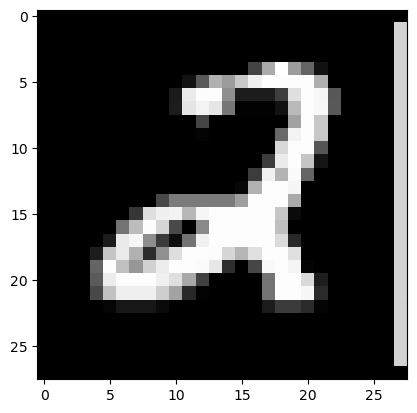

In [157]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [158]:
img = img/255
img = img.reshape(1, 784)

In [165]:
prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
print("Predicted Digit: ", predicted_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Digit:  2
